In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


In [2]:
data = np.load('data1.npy')
labels = np.load('labels1.npy')

In [3]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(254,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
train_data,test_data,train_target,test_target=train_test_split(data,labels,test_size=0.1)

In [5]:
train_target.shape

(3440, 2)

In [6]:
history=model.fit(train_data,train_target,batch_size = 64,epochs=100,validation_data = (test_data,test_target))

Epoch 1/100
54/54 [==============================] - 2s 33ms/step - loss: 0.6051 - accuracy: 0.6596 - val_loss: 0.5308 - val_accuracy: 0.7363
Epoch 2/100
54/54 [==============================] - 1s 25ms/step - loss: 0.3933 - accuracy: 0.8276 - val_loss: 0.3205 - val_accuracy: 0.8668
Epoch 3/100
54/54 [==============================] - 1s 26ms/step - loss: 0.2646 - accuracy: 0.8922 - val_loss: 0.2395 - val_accuracy: 0.9034
Epoch 4/100
54/54 [==============================] - 1s 25ms/step - loss: 0.1912 - accuracy: 0.9230 - val_loss: 0.2325 - val_accuracy: 0.9164
Epoch 5/100
54/54 [==============================] - 1s 25ms/step - loss: 0.1460 - accuracy: 0.9381 - val_loss: 0.2168 - val_accuracy: 0.9112
Epoch 6/100
54/54 [==============================] - 1s 25ms/step - loss: 0.1138 - accuracy: 0.9567 - val_loss: 0.1916 - val_accuracy: 0.9347
Epoch 7/100
54/54 [==============================] - 1s 25ms/step - loss: 0.1055 - accuracy: 0.9587 - val_loss: 0.1528 - val_accuracy: 0.9426
Epoch 

In [7]:
model.save("mask_detector2.h5")

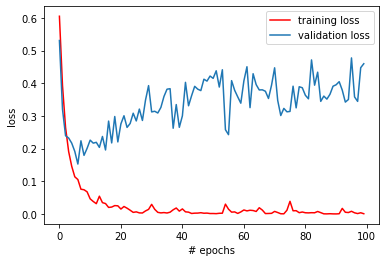

In [8]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

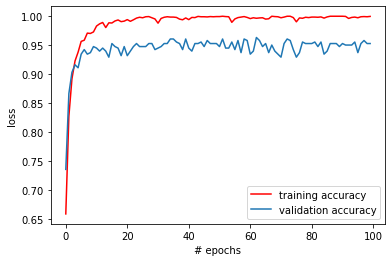

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 0s 10ms/step - loss: 0.4598 - accuracy: 0.9530
[0.45979878306388855, 0.9530026316642761]
